In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

data = pd.read_csv("forestfires.csv")
data = pd.get_dummies(data, columns=['month', 'day'])

X = data.drop(columns=['area'])
y = data['area']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error of RandomForestRegressor:", mse)

Mean Squared Error of RandomForestRegressor: 8867.784988047371


Accuracy of Logistic Regression: 0.5512820512820513


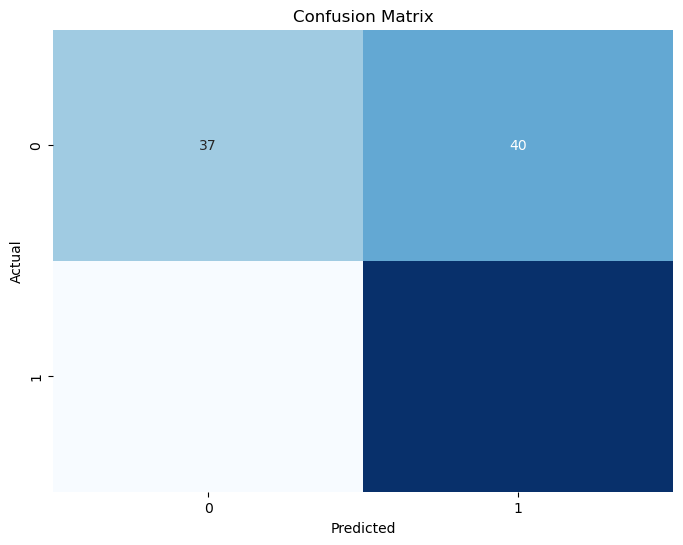

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix

data = pd.read_csv("forestfires.csv")

if data.isnull().values.any():
    data = data.dropna()

data = pd.get_dummies(data, columns=['month', 'day'])
data['fire_presence'] = data['area'].apply(lambda x: 1 if x > 0 else 0)
data.drop(columns=['area'], inplace=True)

X = data.drop(columns=['fire_presence'])
y = data['fire_presence']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


logistic_model = LogisticRegression(random_state=42, max_iter=1000)
logistic_model.fit(X_train_scaled, y_train)

y_pred = logistic_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Logistic Regression:", accuracy)


cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


C:\Users\Rey\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


                 Model  Accuracy
0  Logistic Regression  0.532051
1        Decision Tree  0.519231
2        Random Forest  0.576923


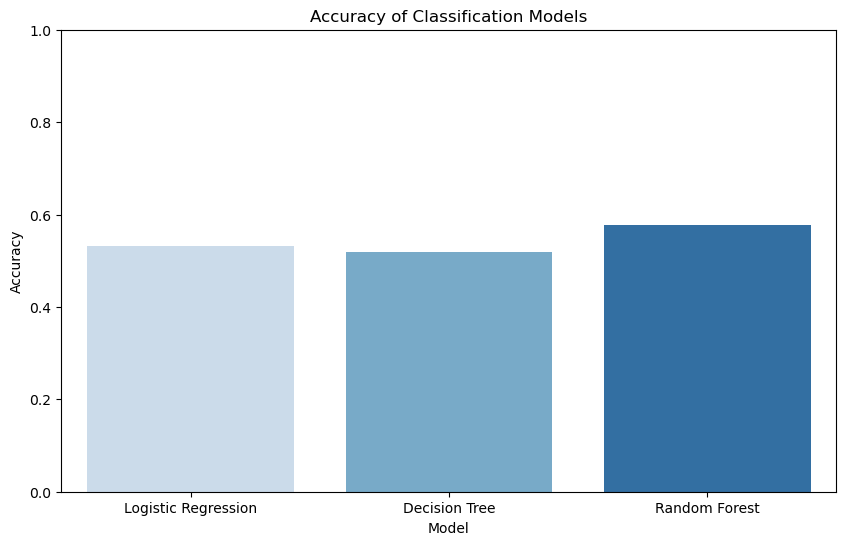

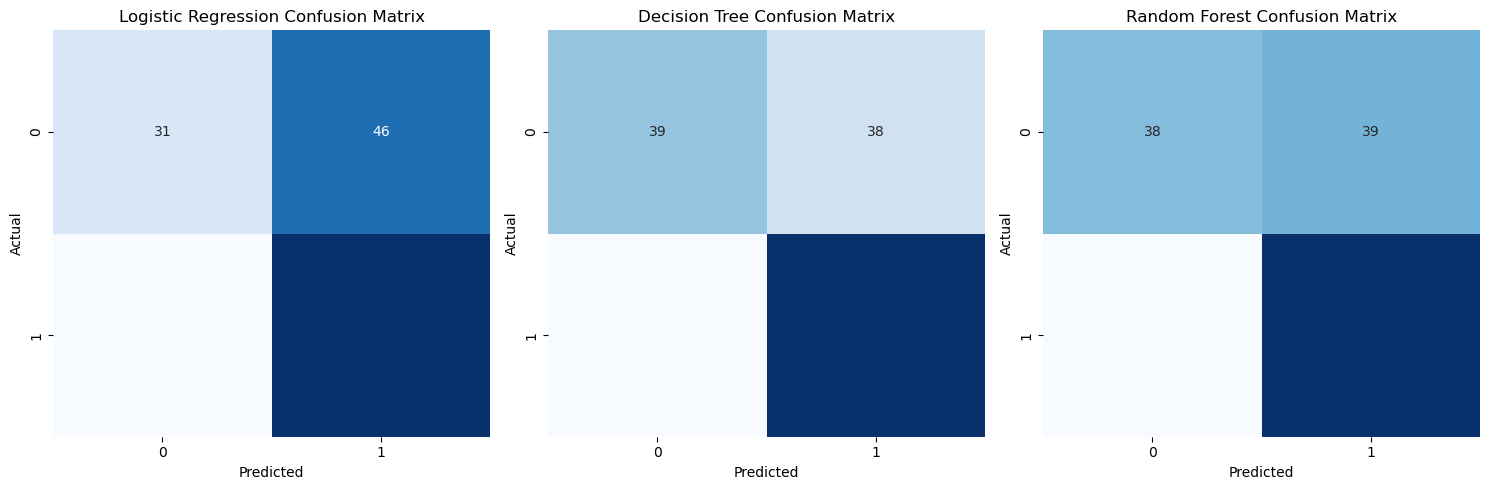

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

data = pd.read_csv("forestfires.csv")

data = pd.get_dummies(data, columns=['month', 'day'])
data['fire_presence'] = data['area'].apply(lambda x: 1 if x > 0 else 0)

data.drop(columns=['area'], inplace=True)

X = data.drop(columns=['fire_presence'])
y = data['fire_presence']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Logistic Regression
logistic_model = LogisticRegression(random_state=42, max_iter=1000)
logistic_model.fit(X_train, y_train)
logistic_pred = logistic_model.predict(X_test)
logistic_accuracy = accuracy_score(y_test, logistic_pred)
logistic_cm = confusion_matrix(y_test, logistic_pred)

# Decision Tree
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)
tree_pred = tree_model.predict(X_test)
tree_accuracy = accuracy_score(y_test, tree_pred)
tree_cm = confusion_matrix(y_test, tree_pred)

# Random Forest
forest_model = RandomForestClassifier(random_state=42)
forest_model.fit(X_train, y_train)
forest_pred = forest_model.predict(X_test)
forest_accuracy = accuracy_score(y_test, forest_pred)
forest_cm = confusion_matrix(y_test, forest_pred)

results = pd.DataFrame({
    "Model": ["Logistic Regression", "Decision Tree", "Random Forest"],
    "Accuracy": [logistic_accuracy, tree_accuracy, forest_accuracy]
})
print(results)

plt.figure(figsize=(10, 6))
sns.barplot(x="Model", y="Accuracy", data=results, palette="Blues")
plt.ylim(0, 1)  # Limit y-axis from 0 to 1 for accuracy scores
plt.title("Accuracy of Classification Models")
plt.show()

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.heatmap(logistic_cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression Confusion Matrix')

plt.subplot(1, 3, 2)
sns.heatmap(tree_cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Decision Tree Confusion Matrix')

plt.subplot(1, 3, 3)
sns.heatmap(forest_cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix')

plt.tight_layout()
plt.show()


Cleaned Data:
   X  Y month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area
0  7  5   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0
1  7  4   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0
2  7  4   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0
3  8  6   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0
4  8  6   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0

Central Tendency:
                X           Y        FFMC         DMC          DC         ISI  \
count  517.000000  517.000000  517.000000  517.000000  517.000000  517.000000   
mean     4.669246    4.299807   90.644681  110.872340  547.940039    9.021663   
std      2.313778    1.229900    5.520111   64.046482  248.066192    4.559477   
min      1.000000    2.000000   18.700000    1.100000    7.900000    0.000000   
25%      3.000000    4.000000   90.200000   68.600000  437.700000    6.500000   
50%      4.000000    4.000000   91.600000  108.300000  

C:\Users\Rey\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Rey\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Rey\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Rey\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead

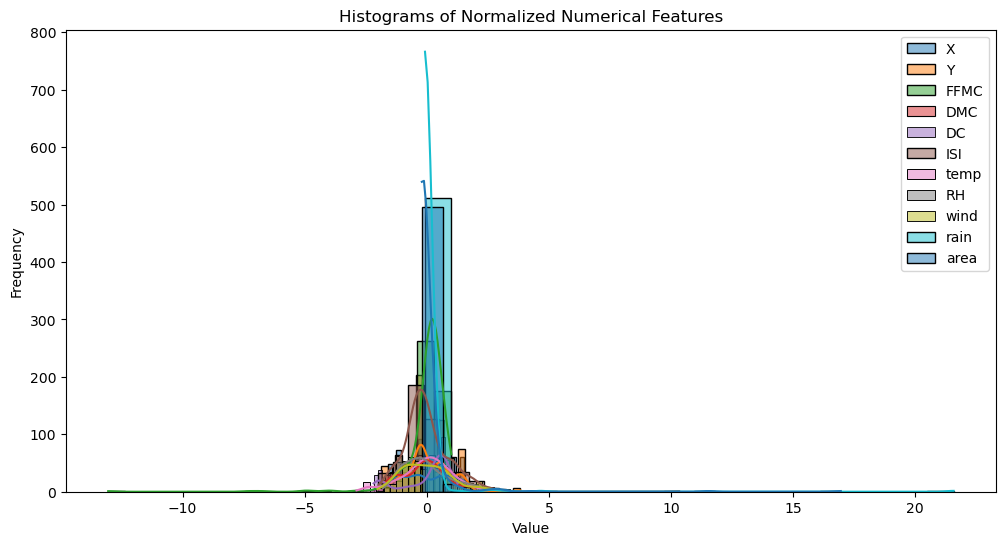


Outlier Removed Data:
   X  Y month  day  FFMC   DMC     DC   ISI  temp  RH  wind  rain  area
0  7  5   mar  fri  86.2  26.2   94.3   5.1   8.2  51   6.7   0.0   0.0
1  7  4   oct  tue  90.6  35.4  669.1   6.7  18.0  33   0.9   0.0   0.0
2  7  4   oct  sat  90.6  43.7  686.9   6.7  14.6  33   1.3   0.0   0.0
5  8  6   aug  sun  92.3  85.3  488.0  14.7  22.2  29   5.4   0.0   0.0
6  8  6   aug  mon  92.3  88.9  495.6   8.5  24.1  27   3.1   0.0   0.0

Mean Squared Error: 314.1299341363293


AttributeError: 'OneHotEncoder' object has no attribute 'get_feature_names'

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

# Load the dataset
df = pd.read_csv("forestfires.csv")

# Data cleaning and preprocessing
df['month'] = pd.Categorical(df['month'], categories=['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'], ordered=True)
df['day'] = pd.Categorical(df['day'], categories=['mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun'], ordered=True)

print("Cleaned Data:")
print(df.head())

# Central tendency
central_tendency = df.describe()
print("\nCentral Tendency:")
print(central_tendency)

# Feature selection and normalization
# Selecting numerical features
numerical_features = df.select_dtypes(include=['float64', 'int64'])

# Normalizing numerical features
scaler = StandardScaler()
numerical_features_normalized = scaler.fit_transform(numerical_features)
numerical_features_normalized_df = pd.DataFrame(numerical_features_normalized, columns=numerical_features.columns)

plt.figure(figsize=(12, 6))
for column in numerical_features_normalized_df.columns:
    sns.histplot(numerical_features_normalized_df[column], kde=True, bins=20, alpha=0.5, label=column)
plt.title('Histograms of Normalized Numerical Features')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Removing outliers
z_scores = np.abs(stats.zscore(numerical_features_normalized))
filtered_entries = (z_scores < 3).all(axis=1)
df_outlier_removed = df[filtered_entries]

print("\nOutlier Removed Data:")
print(df_outlier_removed.head())

X = df_outlier_removed.drop(columns=['area'])  # Features
y = df_outlier_removed['area']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing
numeric_features = X.select_dtypes(include=['float64', 'int64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

rf_regressor = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', RandomForestRegressor(random_state=42))])

rf_regressor.fit(X_train, y_train)

y_pred = rf_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("\nMean Squared Error:", mse)

if hasattr(rf_regressor.named_steps['classifier'], 'feature_importances_'):
    importances = rf_regressor.named_steps['classifier'].feature_importances_
    indices = np.argsort(importances)[::-1]
    feature_names = np.array(numeric_features.tolist() + list(rf_regressor.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot'].get_feature_names(categorical_features)))
    plt.figure(figsize=(12,6))
    sns.barplot(x=importances[indices], y=feature_names[indices])
    plt.title("Feature Importances")
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.show()
